In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Concatenate, MaxPooling2D, Dropout, MaxPooling3D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

Dataset load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q -d 'All-Age_Faces' 'drive/MyDrive/All-Age-Faces Dataset.zip'

replace All-Age_Faces/All-Age-Faces Dataset/aglined faces/00000A02.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!ls

All-Age_Faces  drive  sample_data


In [ ]:
train_people_original = glob.glob('All-Age_Faces/All-Age-Faces Dataset/original images/*.jpg')
train_people_aligned = glob.glob('All-Age_Faces/All-Age-Faces Dataset/aglined faces/*.jpg')
print(len(train_people_original))
print(len(train_people_aligned))

13322
13322


Preprocess data (from dataframe)

In [ ]:
train_people_Young_Child = list()
train_people_Junior_Student = list()
train_people_Senior_Student = list()
train_people_Adult = list()
train_people_Senior = list()

test_people_Young_Child = list()
test_people_Junior_Student = list()
test_people_Senior_Student = list()
test_people_Adult = list()
test_people_Senior = list()

In [ ]:
tmp1 = 0
for i in train_people_original:
    if tmp1 % 5 == 0:
        if int(i.split('.')[0][-2:]) < 8:
            test_people_Young_Child.append(i)
        elif int(i.split('.')[0][-2:]) < 14:
            test_people_Junior_Student.append(i)
        elif int(i.split('.')[0][-2:]) < 20:
            test_people_Senior_Student.append(i)
        elif int(i.split('.')[0][-2:]) < 65:
            test_people_Adult.append(i)
        elif int(i.split('.')[0][-2:]) >= 65:
            test_people_Senior.append(i)
    else:
        if int(i.split('.')[0][-2:]) < 8:
          train_people_Young_Child.append(i)
        elif int(i.split('.')[0][-2:]) < 14:
          train_people_Junior_Student.append(i)
        elif int(i.split('.')[0][-2:]) < 20:
          train_people_Senior_Student.append(i)
        elif int(i.split('.')[0][-2:]) < 65:
          train_people_Adult.append(i)
        elif int(i.split('.')[0][-2:]) >= 65:
          train_people_Senior.append(i)
    tmp1 += 1

In [ ]:
train_people_Young_Child[:5]

['All-Age_Faces/All-Age-Faces Dataset/original images/00082A03.jpg',
 'All-Age_Faces/All-Age-Faces Dataset/original images/00307A06.jpg',
 'All-Age_Faces/All-Age-Faces Dataset/original images/00150A03.jpg',
 'All-Age_Faces/All-Age-Faces Dataset/original images/00199A04.jpg',
 'All-Age_Faces/All-Age-Faces Dataset/original images/00100A03.jpg']

In [ ]:
tmp2 = 0
for i in train_people_original:
    if tmp2 % 5 == 0:
        if int(i.split('.')[0][-2:]) < 8:
            test_people_Young_Child.append(i)
        elif int(i.split('.')[0][-2:]) < 14:
            test_people_Junior_Student.append(i)
        elif int(i.split('.')[0][-2:]) < 20:
            test_people_Senior_Student.append(i)
        elif int(i.split('.')[0][-2:]) < 65:
            test_people_Adult.append(i)
        elif int(i.split('.')[0][-2:]) >= 65:
            test_people_Senior.append(i)
    else:
        if int(i.split('.')[0][-2:]) < 8:
          train_people_Young_Child.append(i)
        elif int(i.split('.')[0][-2:]) < 14:
          train_people_Junior_Student.append(i)
        elif int(i.split('.')[0][-2:]) < 20:
          train_people_Senior_Student.append(i)
        elif int(i.split('.')[0][-2:]) < 65:
          train_people_Adult.append(i)
        elif int(i.split('.')[0][-2:]) >= 65:
          train_people_Senior.append(i)
    tmp2 += 1

In [ ]:
test_people_Young_Child[:5]

['All-Age_Faces/All-Age-Faces Dataset/original images/07530A04.jpg',
 'All-Age_Faces/All-Age-Faces Dataset/original images/07727A07.jpg',
 'All-Age_Faces/All-Age-Faces Dataset/original images/00393A07.jpg',
 'All-Age_Faces/All-Age-Faces Dataset/original images/00024A02.jpg',
 'All-Age_Faces/All-Age-Faces Dataset/original images/07522A04.jpg']

In [ ]:
train_people_Young_Child.sort()
train_people_Junior_Student.sort()
train_people_Senior_Studentt.sort()
train_people_Adult.sort()
train_people_Senior.sort()

test_people_Young_Child.sort()
test_people_Junior_Student.sort()
test_people_Senior_Student.sort()
test_people_Adult.sort()
test_people_Senior.sort()


In [ ]:
train_paths = train_people_Young_Child + train_people_Junior_Student + train_people_Senior_Student + train_people_Adult + train_people_Senior
train_labels = (["Young_Child" for _ in range(len(train_people_Young_Child))] + ["Junior_Student" for _ in range(len(train_people_Junior_Student))]  + ["Senior_Student" for _ in range(len(train_people_Senior_Student))] + 
                  ["Adult" for _ in range(len(train_people_Adult))] + ["Senior" for _ in range(len(train_people_Senior))])
train_df = pd.DataFrame({"path":train_paths, "label":train_labels})

test_paths = test_people_Young_Child + test_people_Junior_Student + test_people_Senior_Student + test_people_Adult + test_people_Senior
test_labels = (["Young_Child" for _ in range(len(test_people_Young_Child))] +  ["Junior_Student" for _ in range(len(test_people_Junior_Student))]  + ["Senior_Student" for _ in range(len(test_people_Senior_Student))] + 
                  ["Adult" for _ in range(len(test_people_Adult))] + ["Senior" for _ in range(len(test_people_Senior))])
test_df = pd.DataFrame({"path":test_paths, "label":test_labels})

print(train_df["label"].value_counts())
print(test_df["label"].value_counts())

Adult             16306
Senior             1340
Young_Child        1256
Senior_Student     1242
Junior_Student     1170
Name: label, dtype: int64
Adult             4076
Senior             354
Young_Child        316
Senior_Student     296
Junior_Student     288
Name: label, dtype: int64


In [ ]:
train_df.value_count()

,path,label
0,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child
1,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child
2,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child
3,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child
4,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child


In [ ]:
test_df.head()

,path,label
0,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child
1,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child
2,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child
3,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child
4,All-Age_Faces/All-Age-Faces Dataset/original i...,Young_Child


In [ ]:
X, valid_df = train_test_split(test_df, test_size=0.2, random_state=42 )

In [ ]:
valid_df.head()

,path,label
1323,All-Age_Faces/All-Age-Faces Dataset/original i...,Adult
1839,All-Age_Faces/All-Age-Faces Dataset/original i...,Adult
798,All-Age_Faces/All-Age-Faces Dataset/original i...,Senior_Student
3856,All-Age_Faces/All-Age-Faces Dataset/original i...,Adult
4553,All-Age_Faces/All-Age-Faces Dataset/original i...,Adult


In [ ]:
len(train_labels)

21314

In [ ]:
len(test_labels)

5330

In [ ]:
len(valid_df.label)

1066

Visualized Image

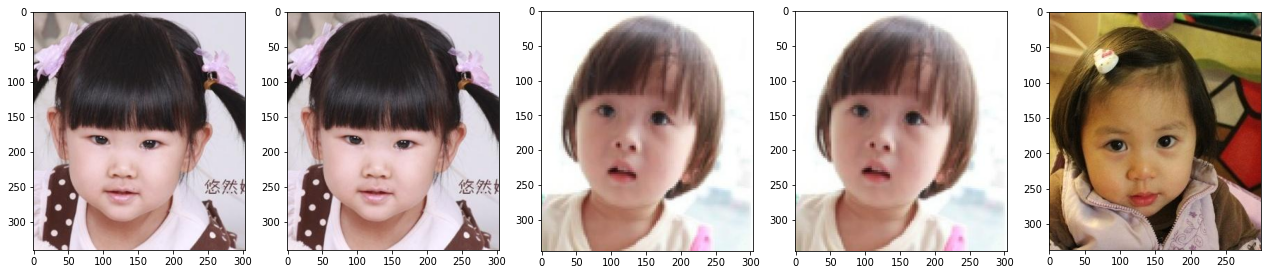

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(22, 6))
train_head = train_df.path[:5]
for i in range(5):
    axes[i].imshow(cv2.cvtColor(cv2.imread(train_head[i]), cv2.COLOR_BGR2RGB))

Check path Image

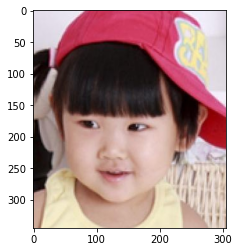

In [ ]:
test01 = cv2.imread(test_df.path[0])
test001 = cv2.cvtColor(test01, cv2.COLOR_BGR2RGB)

plt.imshow(test001)

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 224
train_generator = ImageDataGenerator(rescale = 1/255.0, 
                                   rotation_range=30, 
                                   width_shift_range=0.2, 
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')
train_generator_iterator = train_generator.flow_from_dataframe(dataframe=train_df,
                                                               x_col = "path",
                                                               y_col = "label",
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 21314 validated image filenames belonging to 5 classes.


In [ ]:
test_generator = ImageDataGenerator(rescale=1/255.0 )
test_generator_iterator = test_generator.flow_from_dataframe(dataframe=test_df,
                                                               x_col = "path",
                                                               y_col = "label",
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 5330 validated image filenames belonging to 5 classes.


In [ ]:
valid_generator = ImageDataGenerator(rescale=1/255.0 )
valid_generator_iterator = valid_generator.flow_from_dataframe(dataframe=valid_df,
                                                               x_col = "path",
                                                               y_col = "label",
                                                               target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

Found 1066 validated image filenames belonging to 5 classes.


In [ ]:
image_array, label_array = next(train_generator_iterator)
print(image_array.shape, label_array.shape)

(64, 224, 224, 3) (64, 5)


Create Model

VGG16 Architecture

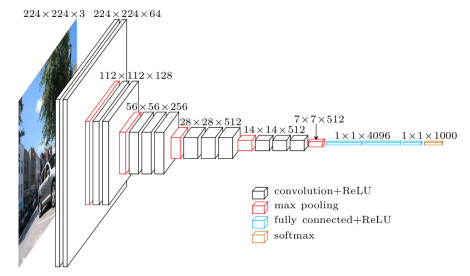

In [ ]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=3,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
# model.add(GlobalAveragePooling2D())
# model.add(Dense(units=256,activation="relu"))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(Dense(units=5, activation="softmax"))

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
input_tensor = Input(shape=(224,224,3))
base_model = VGG16(include_top=False, input_tensor=input_tensor)
x = base_model.output

x = GlobalAveragePooling2D()(x)
x = Dense(units=256,activation="relu")(x)
output = Dense(units=5, activation="softmax")(x)

model = Model(inputs=input_tensor, outputs=output)
# # model = load_model("/content/drive/MyDrive/Colab Notebooks/my_VGG16_model.h5")

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in model.layers:
    print(layer.name, layer.trainable)

input_1 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
global_average_pooling2d True
dense True
dense_1 True


Compile Model & Training

In [ ]:
checkpoint_cb = ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/my_VGG16_model3.h5", save_best_only=True, verbose=1, )
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
reducelr_cb = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, mode="min", verbose=1)

In [ ]:
model.compile(optimizer=Adam(0.0001), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
history = model.fit(train_generator_iterator, epochs=15, validation_data=valid_generator_iterator,
                   callbacks=[checkpoint_cb, early_stopping_cb, reducelr_cb])

Epoch 1/15
334/334 [==============================] - 232s 692ms/step - loss: 0.7842 - categorical_accuracy: 0.7695 - val_loss: 0.6930 - val_categorical_accuracy: 0.7683

Epoch 00001: val_loss improved from inf to 0.69298, saving model to /content/drive/MyDrive/Colab Notebooks/my_VGG16_model3.h5
Epoch 2/15
334/334 [==============================] - 231s 691ms/step - loss: 0.6202 - categorical_accuracy: 0.8010 - val_loss: 0.5377 - val_categorical_accuracy: 0.8105

Epoch 00002: val_loss improved from 0.69298 to 0.53769, saving model to /content/drive/MyDrive/Colab Notebooks/my_VGG16_model3.h5
Epoch 3/15
334/334 [==============================] - 232s 692ms/step - loss: 0.5352 - categorical_accuracy: 0.8206 - val_loss: 0.4925 - val_categorical_accuracy: 0.8208

Epoch 00003: val_loss improved from 0.53769 to 0.49253, saving model to /content/drive/MyDrive/Colab Notebooks/my_VGG16_model3.h5
Epoch 4/15
334/334 [==============================] - 231s 692ms/step - loss: 0.4955 - categorical_ac

In [ ]:
model.evaluate(test_generator_iterator)

84/84 [==============================] - 12s 143ms/step - loss: 0.4367 - categorical_accuracy: 0.8386


[0.43672093749046326, 0.8386491537094116]